In [5]:
import matplotlib.pyplot as plt
import pandas as pd #this is how I usually import pandas
import sys #only needed to determine Python version number
import matplotlib #only needed to determine Matplotlib version number
import glob
import numpy as np


def prunDataFrame(dataframe):
    dataframe = dataframe.drop('geo', 1)
    dataframe = dataframe.drop('mx', 1)
    dataframe = dataframe.drop('mn', 1)
    dataframe = dataframe.drop('wc', 1)


    dataframe = dataframe[['latency','start_ts']].apply(pd.to_numeric,errors='coerce')
    dataframe = dataframe.sort_values(by='start_ts', ascending=[True])

   # dataframe = dataframe.drop('window', 1)
    return dataframe

def buildDataFrame(filePath):
    df_temp = pd.read_csv(filePath,names=['geo','latency','mx','mn','wc','start_ts'])
    df_temp = prunDataFrame(df_temp)
    return df_temp


def pruneForDenseWindows(dataframe,percentage):
    pd.to_numeric(dataframe.wc)
    topWindows = dataframe.wc.quantile(percentage)
    #print(topWindows)
    dataframe = dataframe[dataframe.wc > topWindows  ]
    return dataframe


def pandasDraw(listOfFilePaths,_figsize,_range,_quantile=None):
    for fileGroup in listOfFilePaths:
        df_list = []
        for file in fileGroup:
            column_name = file.rsplit('.', 1)[0]
            temp_df = buildDataFrame(file)
            if not (_quantile is None):
                temp_df = pruneForDenseWindows(temp_df,_quantile)
            temp_df_with_cols = pd.DataFrame({column_name:temp_df.latency},
                    columns=[column_name])
            df_list.append(temp_df_with_cols)
        df_final = pd.concat(df_list)
        ax_df_final = df_final.hist(figsize=_figsize,bins=100,range=_range)
    plt.show()
    






Flink
Data generation rate into buffer: 210K ps
Memory allocation- 8G per each node
x axis indicates the latency of tuples
y axis indicates the number of tuples with specified latency


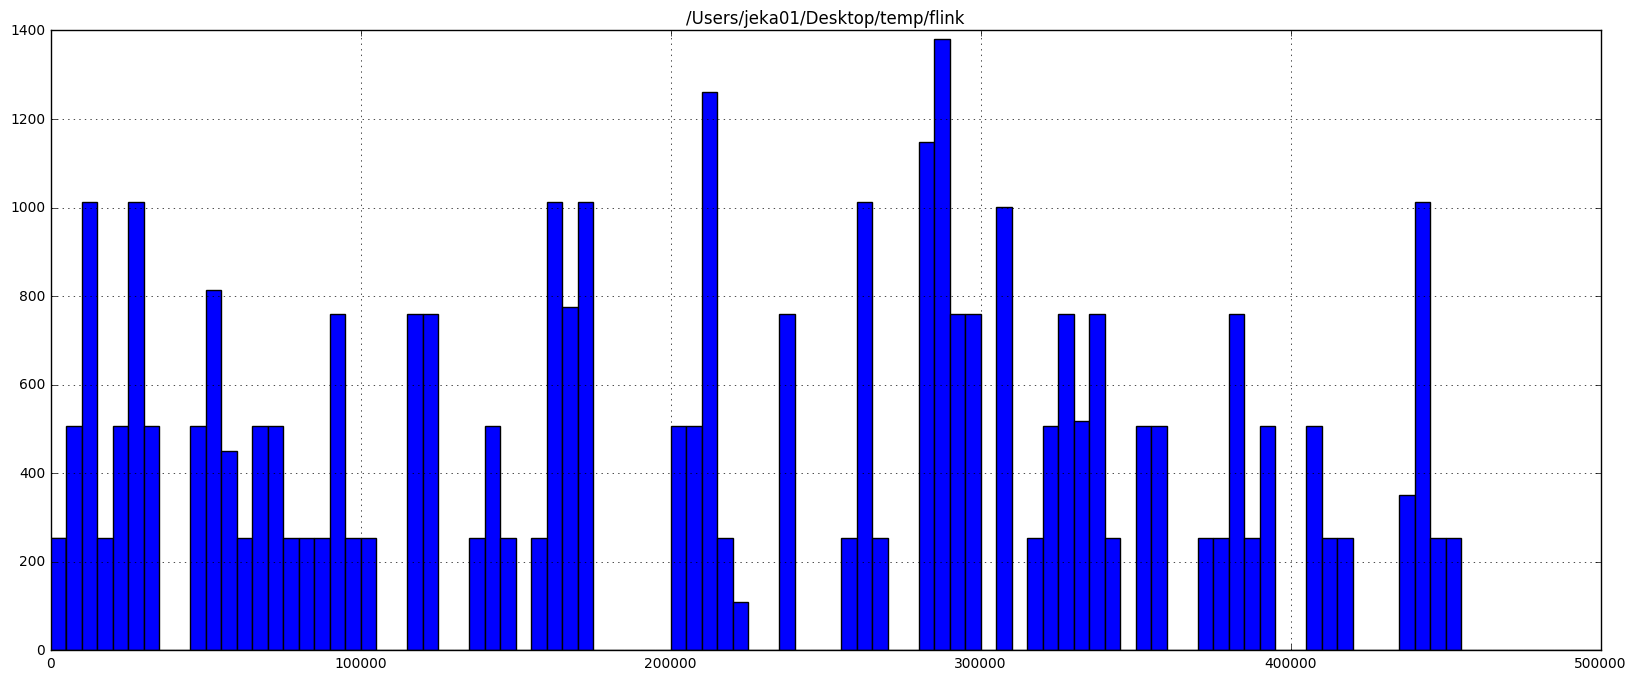

In [6]:
print('Flink')
print('Data generation rate into buffer: 210K ps')
print('Memory allocation- 8G per each node')
print('x axis indicates the latency of tuples')
print('y axis indicates the number of tuples with specified latency')




figsize = (20,8)
range = [0,500000]
# temp_df  = buildDataFrame('/Users/jeka01/Desktop/temp/atempfile.csv')
# df = pd.DataFrame({'latency':temp_df.latency, 'index_col':temp_df.index_col},
#                     columns=['latency','index_col'])


#df.plot.bar(y='latency', x = 'index_col',figsize=(200,40))
#print(df.lateindex_colncy)
#x = x.reset_index()
#x = x.groupby(x['index_col'].div(3)).mean()


# pandasDraw([['/Users/jeka01/Desktop/temp/tempfile.csv']],
#             _figsize=figsize,_range=range)
# range = [0,5000]

pandasDraw([['/Users/jeka01/Desktop/temp/flink.csv']],
            _figsize=figsize,_range=range)

plt.show()




Flink
Data generation rate into buffer: 210K ps
Memory allocation- 8G per each node
x axis indicates the generation time of tuple
y axis indicates the latency of the tuple with given generation time
This can be thought as the visualization of latencies as we progress


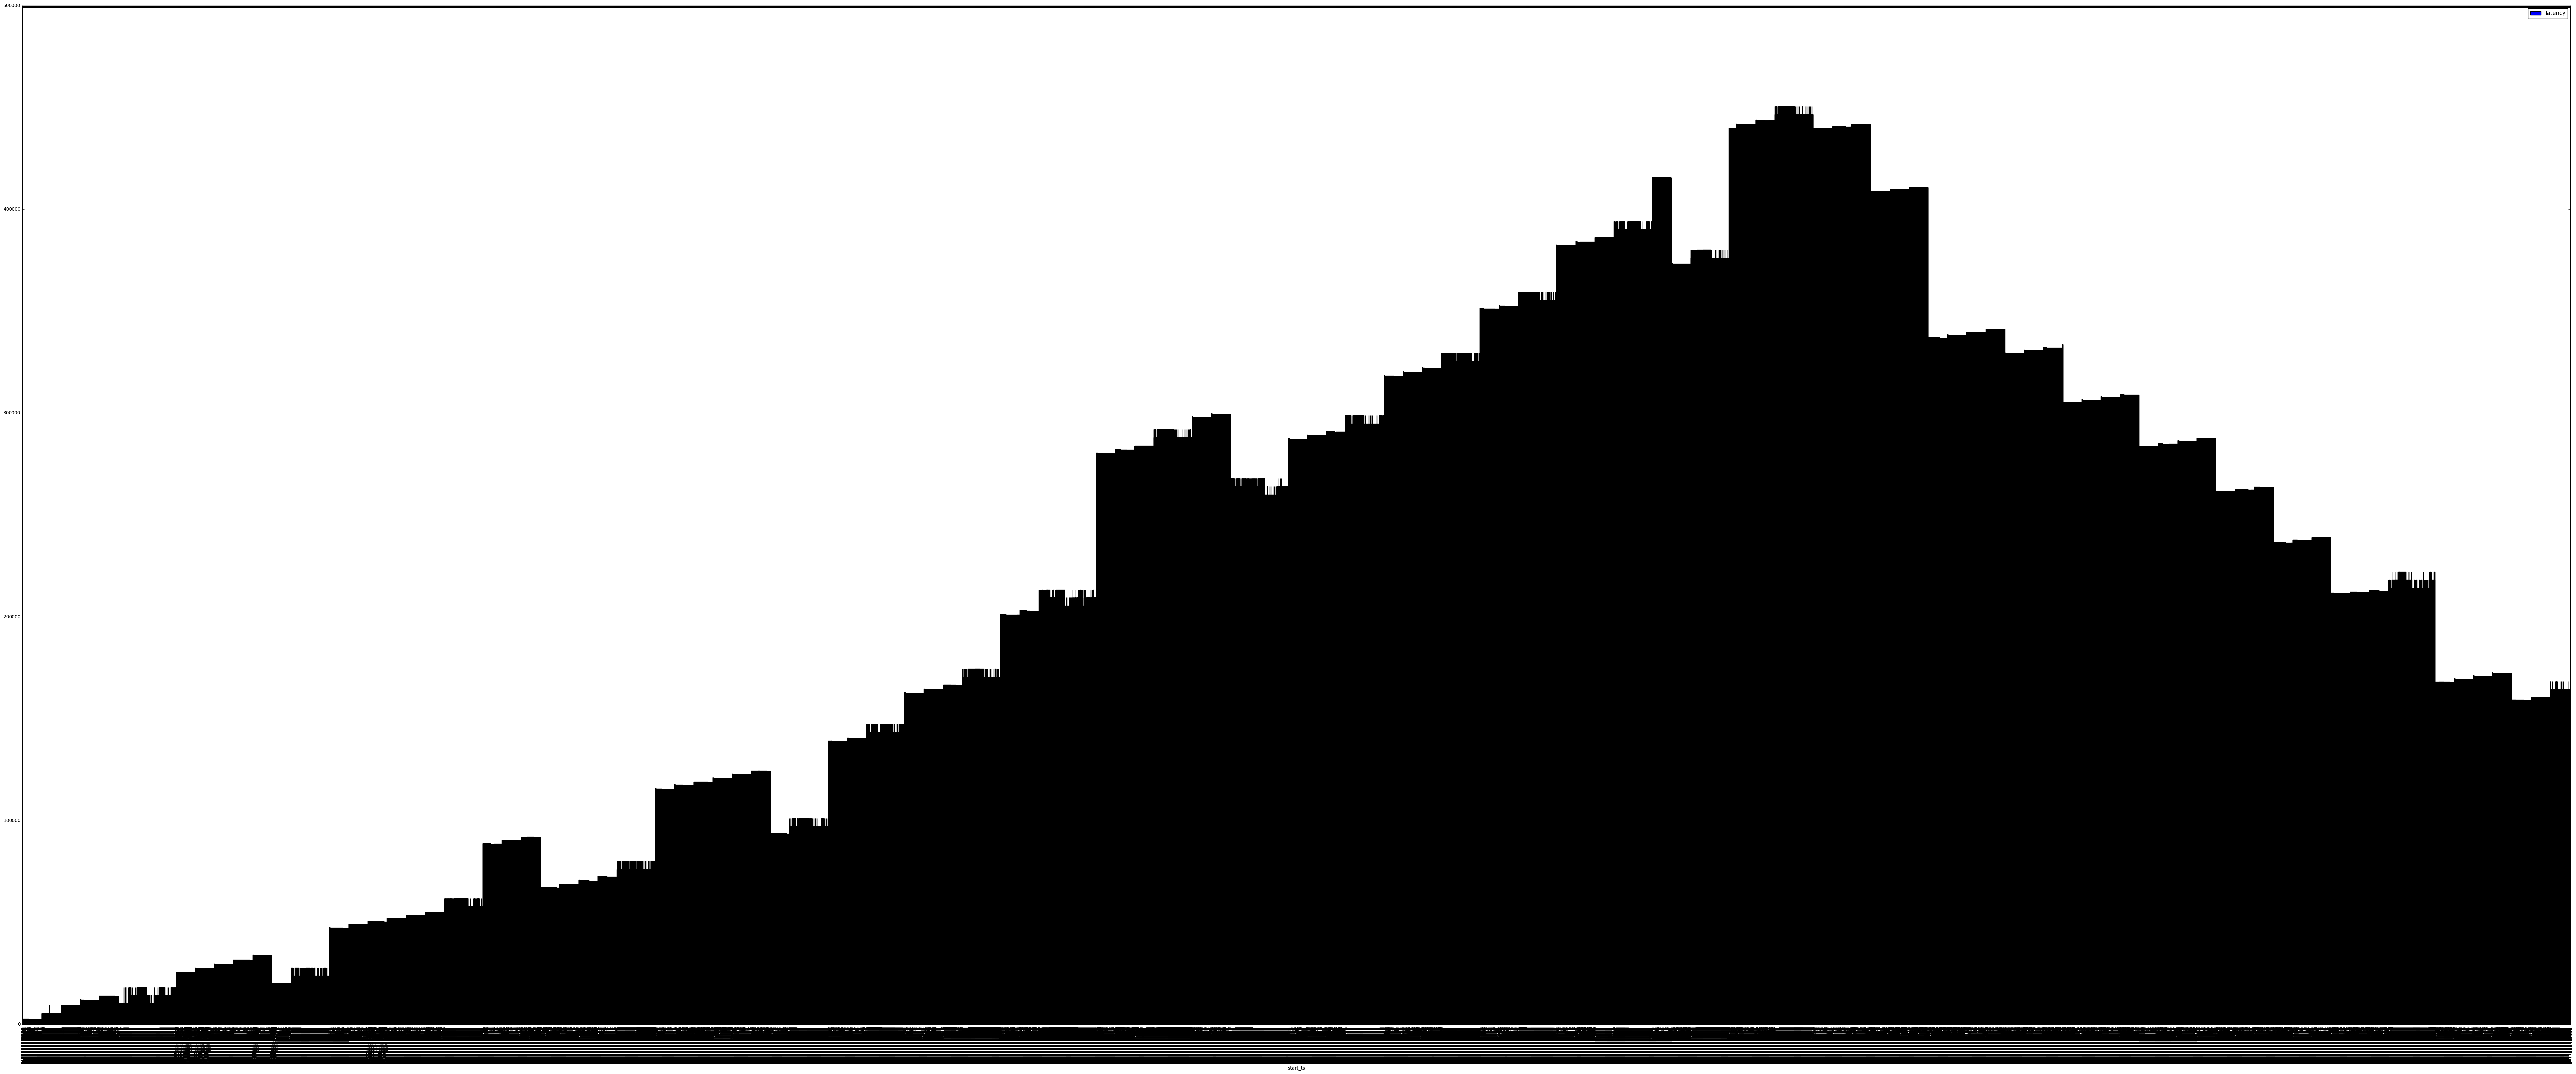

In [9]:
print('Flink')
print('Data generation rate into buffer: 210K ps')
print('Memory allocation- 8G per each node')
print('x axis indicates the generation time of tuple')
print('y axis indicates the latency of the tuple with given generation time')
print('This can be thought as the visualization of latencies as we progress')




temp_df  = buildDataFrame('/Users/jeka01/Desktop/temp/flink.csv')
df = pd.DataFrame({'latency':temp_df.latency, 'start_ts':temp_df.start_ts},
                      columns=['latency','start_ts'])
df.plot.bar(y='latency', x = 'start_ts',figsize=(100,40))

plt.show()


In [8]:

print('Spark')
print('Data generation rate into buffer: 210K ps')
print('Memory allocation- 8G per each node')
print('Job failed with memory issues')



Spark
Data generation rate into buffer: 210K ps
Memory allocation- 8G per each node
Job failed with memory issues


Spark
Data generation rate into buffer: 210K ps
Memory allocation- 16G per each node
x axis indicates the latency of tuples
y axis indicates the number of tuples with specified latency


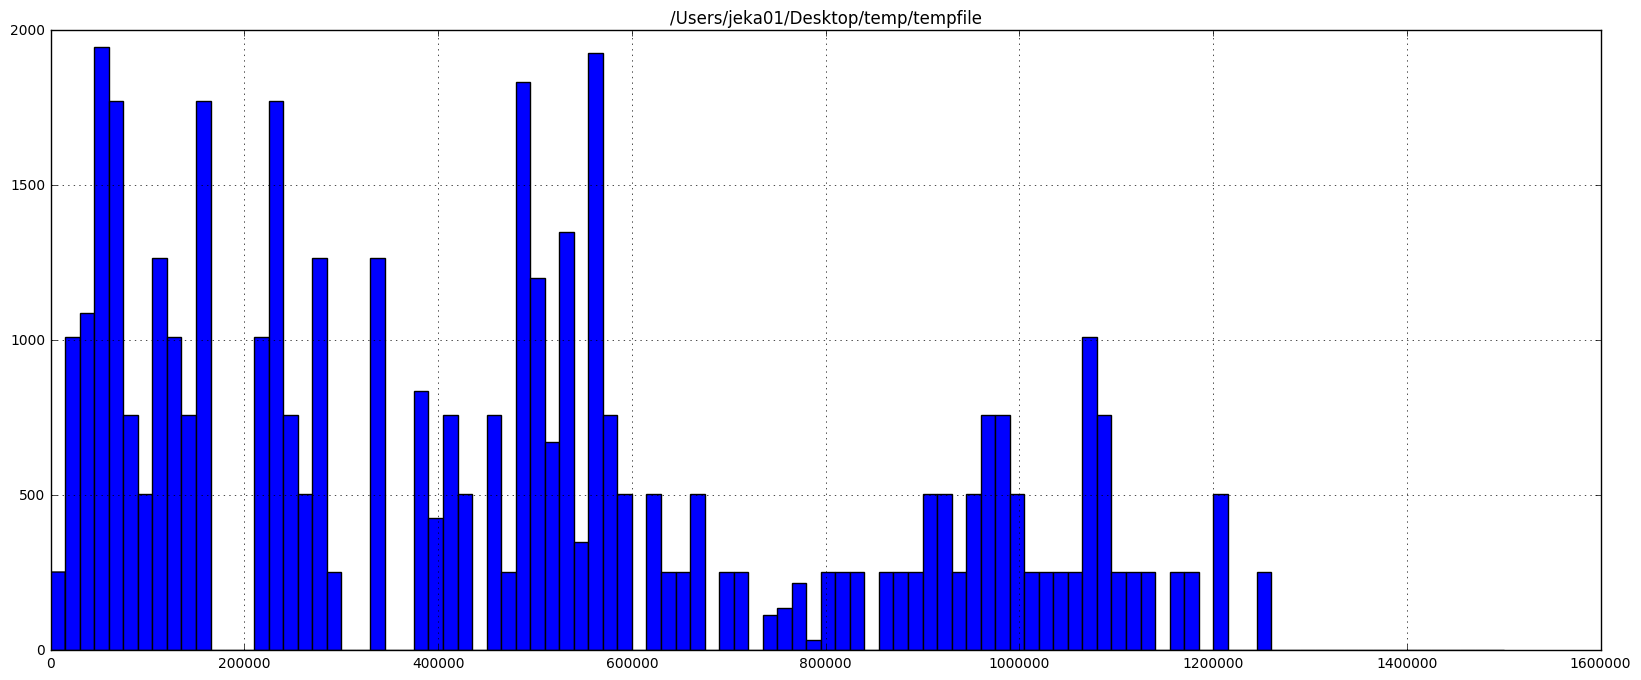

In [13]:
print('Spark')
print('Data generation rate into buffer: 210K ps')
print('Memory allocation- 16G per each node')
print('x axis indicates the latency of tuples')
print('y axis indicates the number of tuples with specified latency')




figsize = (20,8)
range = [0,1500000]

pandasDraw([['/Users/jeka01/Desktop/temp/tempfile.csv']],
            _figsize=figsize,_range=range)

plt.show()




Spark
Data generation rate into buffer: 210K ps
Memory allocation- 16G per each node
x axis indicates the generation time of tuple
y axis indicates the latency of the tuple with given generation time
This can be thought as the visualization of latencies as we progress


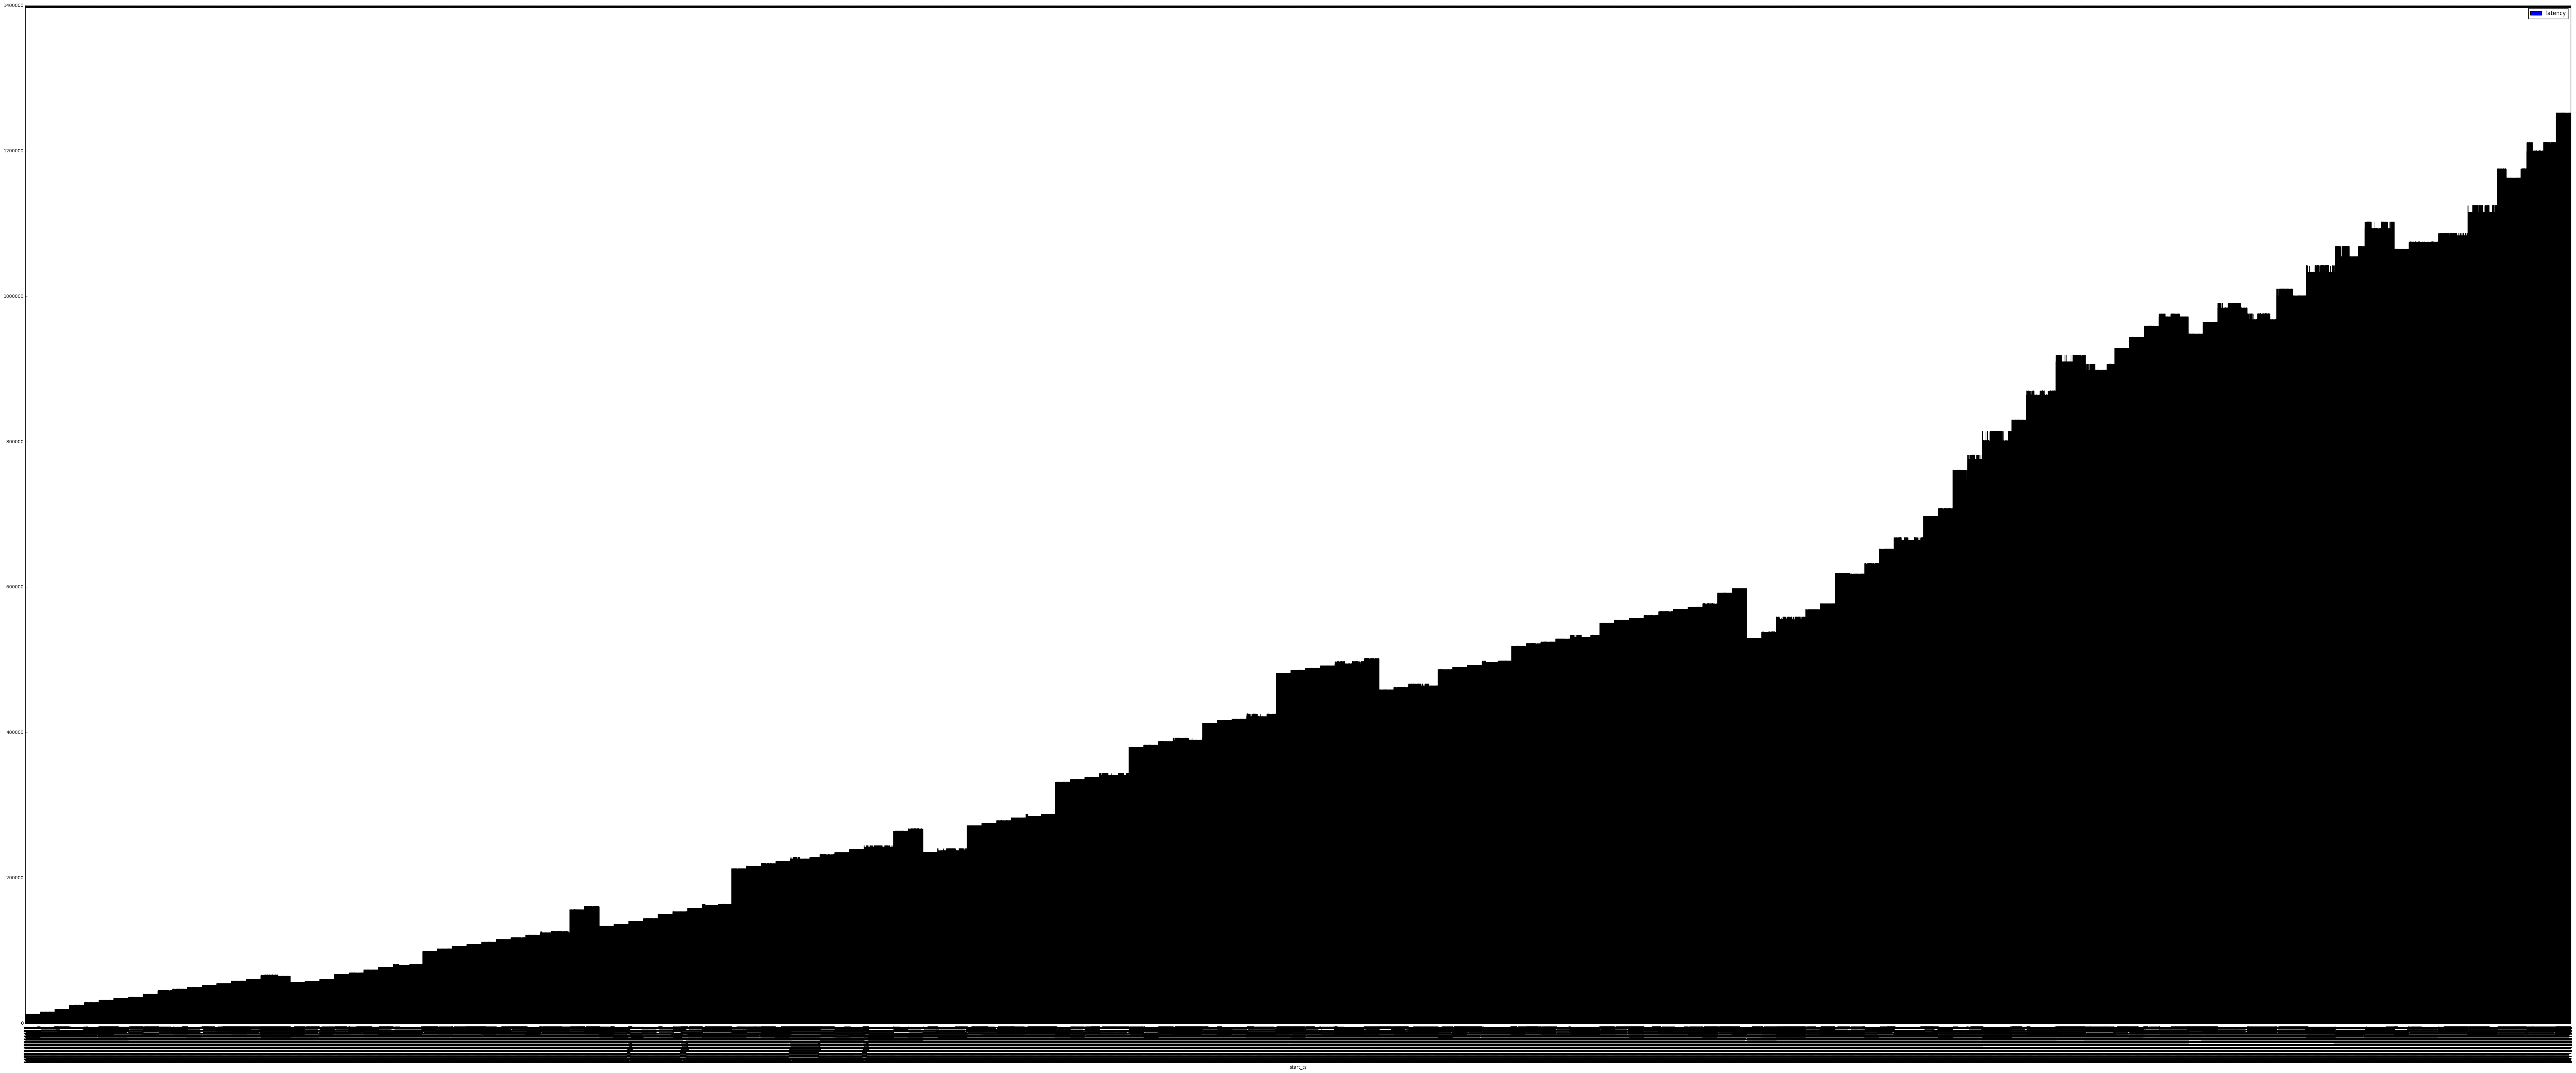

In [8]:
print('Spark')
print('Data generation rate into buffer: 210K ps')
print('Memory allocation- 16G per each node')
print('x axis indicates the generation time of tuple')
print('y axis indicates the latency of the tuple with given generation time')
print('This can be thought as the visualization of latencies as we progress')




temp_df  = buildDataFrame('/Users/jeka01/Desktop/temp/tempfile.csv')
df = pd.DataFrame({'latency':temp_df.latency, 'start_ts':temp_df.start_ts},
                      columns=['latency','start_ts'])
df.plot.bar(y='latency', x = 'start_ts',figsize=(100,40))

plt.show()

